##Carga de datos

Carga el ambiente, carpetas que se encuentran en el drive. Se creó una estructura:

ProyectoFinal
  * src: recursos para la carga de datos y división
del set de datos
  * models: modelos que se entrenaron
  * resultados obtenidos


In [1]:
from google.colab import drive
drive.mount("/content/drive")
import sys
# Asegurar que Colab pueda encontrar los módulos
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ProyectoFinal/')

Mounted at /content/drive


Carga el dataset que contiene los audios de los 4 datasets que se van a utilizar. Realiza la llamada a la función run_pipeline que contiene la llamada a funciones que realizan la carga y extracción de características de los audios.

In [2]:
import pandas as pd
import numpy as np
from src.load_data import run_pipeline
# Importar datasets de Kaggle
import kagglehub

uwrfkaggler_ravdess_emotional_speech_audio_path = kagglehub.dataset_download('uwrfkaggler/ravdess-emotional-speech-audio')
ejlok1_toronto_emotional_speech_set_tess_path = kagglehub.dataset_download('ejlok1/toronto-emotional-speech-set-tess')
ejlok1_cremad_path = kagglehub.dataset_download('ejlok1/cremad')
ejlok1_surrey_audiovisual_expressed_emotion_savee_path = kagglehub.dataset_download('ejlok1/surrey-audiovisual-expressed-emotion-savee')

Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

# Ejecutar pipeline
X, Y = run_pipeline(
    ravdess_path=Ravdess,
    crema_path=Crema,
    tess_path=Tess,
    savee_path=Savee
)
print("✅ Datos procesados:")
print(f"Características: {X.shape}")
print(f"Etiquetas codificadas: {Y.shape}")

100%|██████████| 429M/429M [00:14<00:00, 30.7MB/s]

Extracting files...


100%|██████████| 428M/428M [00:15<00:00, 29.6MB/s]

Extracting files...


100%|██████████| 451M/451M [00:15<00:00, 30.0MB/s]

Extracting files...


100%|██████████| 107M/107M [00:04<00:00, 24.6MB/s]

Extracting files...


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'

In [ ]:
df2 = pd.DataFrame(X)
df2.head()

,zcr_mean,zcr_std,chroma_0_mean,chroma_1_mean,chroma_2_mean,chroma_3_mean,chroma_4_mean,chroma_5_mean,chroma_6_mean,chroma_7_mean,...,mel_118_std,mel_119_std,mel_120_std,mel_121_std,mel_122_std,mel_123_std,mel_124_std,mel_125_std,mel_126_std,mel_127_std
0,0.237382,0.159758,0.682273,0.670519,0.614793,0.579039,0.566803,0.637206,0.667451,0.663883,...,12.781337,12.723186,12.708789,12.465545,12.396869,12.844910,13.083874,13.260138,12.842804,9.617676
1,0.256113,0.237830,0.621621,0.580278,0.598515,0.628296,0.598015,0.597272,0.650352,0.698635,...,12.506840,11.956298,11.016152,10.222940,10.303385,10.201467,10.435433,10.485546,9.947417,5.900767
2,0.180632,0.173918,0.621834,0.632666,0.567364,0.558964,0.592169,0.638070,0.635625,0.634870,...,11.678824,11.665054,11.856712,12.042479,11.813621,11.407269,11.582435,11.562826,10.382841,6.893385
3,0.194467,0.189616,0.577846,0.518141,0.518500,0.567115,0.573556,0.601067,0.624448,0.640395,...,11.534732,11.432025,11.263961,11.215117,10.803807,10.611653,10.498607,9.907557,8.604996,5.136149
4,0.257944,0.256021,0.545206,0.539127,0.604126,0.580997,0.573062,0.582135,0.618550,0.638581,...,12.765538,12.744137,12.865875,12.422704,11.991399,12.377029,12.279249,12.754234,11.894744,7.751270


In [ ]:
df2 = pd.DataFrame(Y)
df2.head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# División en conjunto de entrenamiento, prueba y validación

Se crea una función prepare_datasets2, la cual realiza la división de los datos en el set de entrenamiento (70%), validación(15%) y test(15%). Adicionalmente, almacena estos set de datos como .pkl con el objetivo de asegurar los mismos datos en los diferentes modelos.

In [ ]:
from src.split_dataset import prepare_datasets, prepare_datasets2, check_dataset  # si guardas esta función en prepare_data.py
from src.split_data import split_data

#x_train, x_test, y_train, y_test, feature_names = prepare_datasets(X, Y)
#x_train, x_test, x_val, y_train, y_test, y_val = split_data(X, Y)
x_train, x_val, x_test, y_train, y_val, y_test, feature_names = prepare_datasets2(X, Y)

Tamaño del conjunto de entrenamiento: 8513 muestras
Tamaño del conjunto de validación: 1824 muestras
Tamaño del conjunto de prueba: 1825 muestras
✅ Datos guardados en /content/drive/MyDrive/Colab Notebooks/ProyectoFinal/src/

📋 Primeras 5 filas del set de entrenamiento:
   zcr_mean   zcr_std  chroma_0_mean  chroma_1_mean  chroma_2_mean  \
0  0.760777  1.011629      -0.031608      -0.033264       0.523950   
1 -0.317028 -0.262760      -0.263159      -0.938409      -0.925992   
2 -0.244129 -0.410715      -0.326555      -0.581918       0.242250   
3 -0.163342  0.010134      -0.081064      -0.658031      -0.211599   
4 -0.481282 -0.288684      -2.918474      -1.544523      -2.858329   

   chroma_3_mean  chroma_4_mean  chroma_5_mean  chroma_6_mean  chroma_7_mean  \
0       0.959187       1.370919       0.579091      -0.039696      -0.005845   
1      -0.405301      -0.697701      -0.678158      -0.213226      -0.079548   
2       0.784771       0.047054      -0.031825      -0.008998       

Se visualiza el set de datos de entrenamiento, en dónde se confirma el desbalanceo de clases como neutral, sorprendido y calma.

   zcr_mean   zcr_std  chroma_0_mean  chroma_1_mean  chroma_2_mean  \
0  0.760777  1.011629      -0.031608      -0.033264       0.523950   
1 -0.317028 -0.262760      -0.263159      -0.938409      -0.925992   
2 -0.244129 -0.410715      -0.326555      -0.581918       0.242250   
3 -0.163342  0.010134      -0.081064      -0.658031      -0.211599   
4 -0.481282 -0.288684      -2.918474      -1.544523      -2.858329   

   chroma_3_mean  chroma_4_mean  chroma_5_mean  chroma_6_mean  chroma_7_mean  \
0       0.959187       1.370919       0.579091      -0.039696      -0.005845   
1      -0.405301      -0.697701      -0.678158      -0.213226      -0.079548   
2       0.784771       0.047054      -0.031825      -0.008998       1.117172   
3       0.897618       1.333918       1.291729      -0.370395      -0.788648   
4      -2.247545      -1.800552       0.626386       2.486773      -1.788898   

   ...  mel_120_std  mel_121_std  mel_122_std  mel_123_std  mel_124_std  \
0  ...    -0.880425    

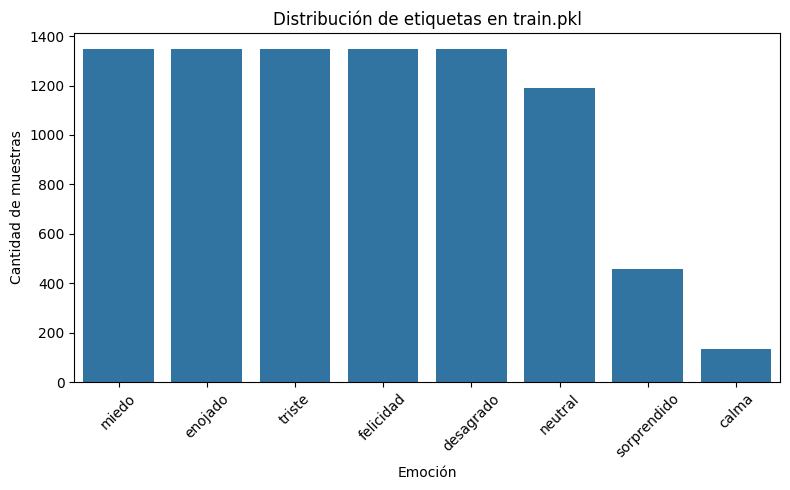

In [ ]:
from src.split_dataset import check_train
check_train("train.pkl")

# Proceso de Balanceo

Se realiza el proceso de balanceo utilizando SMOTE

In [ ]:
from src.balanceo_data import balancear_smote
from src.balanceo_data import balancear_smotepkl

# Aplicar la función
# X_balanceado, y_balanceado = balancear_smote(x_train, y_train)
X_balanceado, y_balanceado = balancear_smotepkl()


✅ Balanceo con SMOTE realizado:
Forma de X_train después de SMOTE: (10768, 364)
Forma de Y_train después de SMOTE: (10768,)
📦 Datos balanceados guardados en: /content/drive/MyDrive/Colab Notebooks/ProyectoFinal/src/train_balanced.pkl


Se visualiza el set de datos de entrenamiento balanceado, en dónde se confirma existe balanceo entre todas las clases, incluido neutral, sorprendido y calma.

   zcr_mean   zcr_std  chroma_0_mean  chroma_1_mean  chroma_2_mean  \
0  0.760777  1.011629      -0.031608      -0.033264       0.523950   
1 -0.317028 -0.262760      -0.263159      -0.938409      -0.925992   
2 -0.244129 -0.410715      -0.326555      -0.581918       0.242250   
3 -0.163342  0.010134      -0.081064      -0.658031      -0.211599   
4 -0.481282 -0.288684      -2.918474      -1.544523      -2.858329   

   chroma_3_mean  chroma_4_mean  chroma_5_mean  chroma_6_mean  chroma_7_mean  \
0       0.959187       1.370919       0.579091      -0.039696      -0.005845   
1      -0.405301      -0.697701      -0.678158      -0.213226      -0.079548   
2       0.784771       0.047054      -0.031825      -0.008998       1.117172   
3       0.897618       1.333918       1.291729      -0.370395      -0.788648   
4      -2.247545      -1.800552       0.626386       2.486773      -1.788898   

   ...  mel_120_std  mel_121_std  mel_122_std  mel_123_std  mel_124_std  \
0  ...    -0.880425    

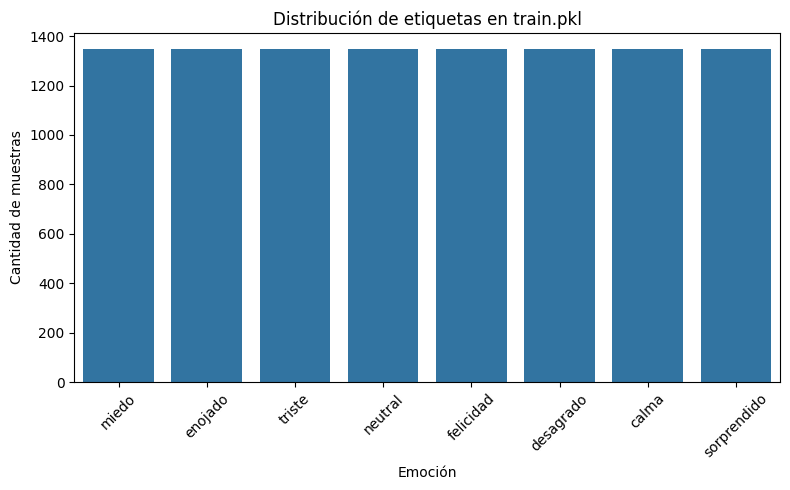

In [ ]:
from src.split_dataset import check_train
check_train("train_balanced.pkl")

# Modelo Random Forest



✅ Clases cargadas desde class_labels.npy:
['calma', 'desagrado', 'enojado', 'felicidad', 'miedo', 'neutral', 'sorprendido', 'triste']
📦 Modelo guardado en: /content/drive/MyDrive/Colab Notebooks/ProyectoFinal/models/random_forest_model.pkl
['calma', 'desagrado', 'enojado', 'felicidad', 'miedo', 'neutral', 'sorprendido', 'triste']

📊 Métricas de evaluación:
✔️ Accuracy: 0.5907
✔️ Precision (weighted): 0.5993
✔️ Recall (weighted): 0.5907
✔️ F1-score (weighted): 0.5810
✔️ Balanced Accuracy: 0.6548

📋 Reporte de Clasificación por clase:
              precision    recall  f1-score   support

       calma       0.51      0.89      0.65        28
   desagrado       0.56      0.43      0.49       289
     enojado       0.67      0.76      0.72       289
   felicidad       0.53      0.53      0.53       288
       miedo       0.70      0.38      0.49       289
     neutral       0.52      0.73      0.61       255
 sorprendido       0.68      0.93      0.79        98
      triste       0.58     

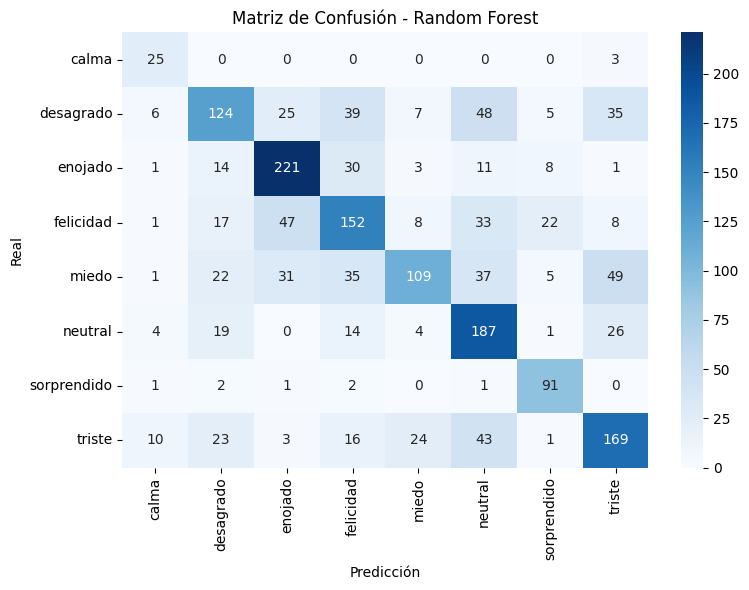

In [ ]:
#importa la funcion run_random_forest del archivo randomforest en la carpeta models
from models.randomforest import run_random_forest

# Ejecutar modelo Random Forest
model, x_test_sample, feature_names = run_random_forest() # bandera que internamente balancea los datos - revisar

# Características Principales

🔍 Generando explicaciones SHAP ...


  0%|          | 0/100 [00:00<?, ?it/s]

⚠️ Convertido shap_values de array 3D a lista de arrays 2D (por clase)


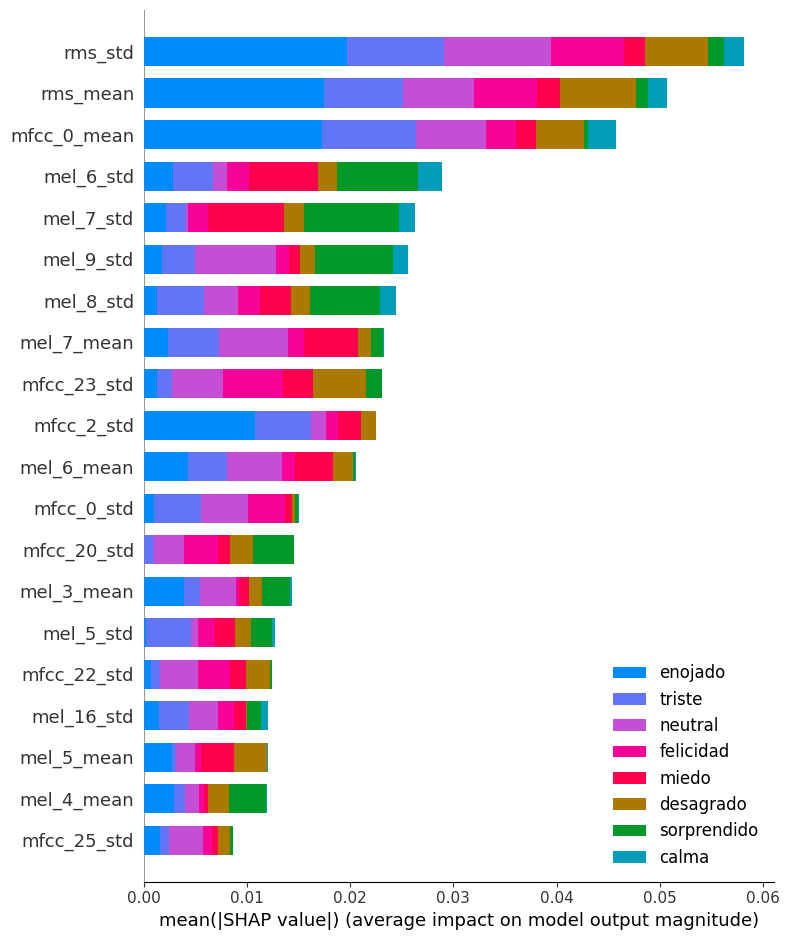

🖼️ Gráfico SHAP guardado en: /content/drive/MyDrive/Colab Notebooks/ProyectoFinal/results/shap_summary_plot_svm.png
📄 Importancias SHAP guardadas en CSV: /content/drive/MyDrive/Colab Notebooks/ProyectoFinal/results/shap_feature_importance_svm.csv


In [ ]:
from results.shap_graph import generate_shap_outputs

#print("📐 x_test_sample shape:", x_test_sample.shape)  # debe ser (N, M)
#print("📐 len(feature_names):", len(feature_names))    # debe ser M

# Generar explicaciones SHAP y exportar gráfico + CSV
generate_shap_outputs(model, x_test_sample, feature_names)

# SVM (Support Vector Machine)

SVM sin balanceo

📦 Modelo SVM guardado en: /content/drive/MyDrive/Colab Notebooks/ProyectoFinal/models/svm_model.pkl

📊 Métricas de evaluación:
✔️ Accuracy: 0.6290
✔️ Precision (weighted): 0.6378
✔️ Recall (weighted): 0.6290
✔️ F1-score (weighted): 0.6258
✔️ Balanced Accuracy: 0.6494

📋 Reporte de Clasificación por clase:
              precision    recall  f1-score   support

       calma       0.53      0.64      0.58        28
   desagrado       0.58      0.48      0.53       289
     enojado       0.72      0.82      0.77       289
   felicidad       0.63      0.62      0.62       288
       miedo       0.71      0.46      0.55       289
     neutral       0.53      0.68      0.59       255
 sorprendido       0.92      0.85      0.88        98
      triste       0.56      0.65      0.60       289

    accuracy                           0.63      1825
   macro avg       0.65      0.65      0.64      1825
weighted avg       0.64      0.63      0.63      1825



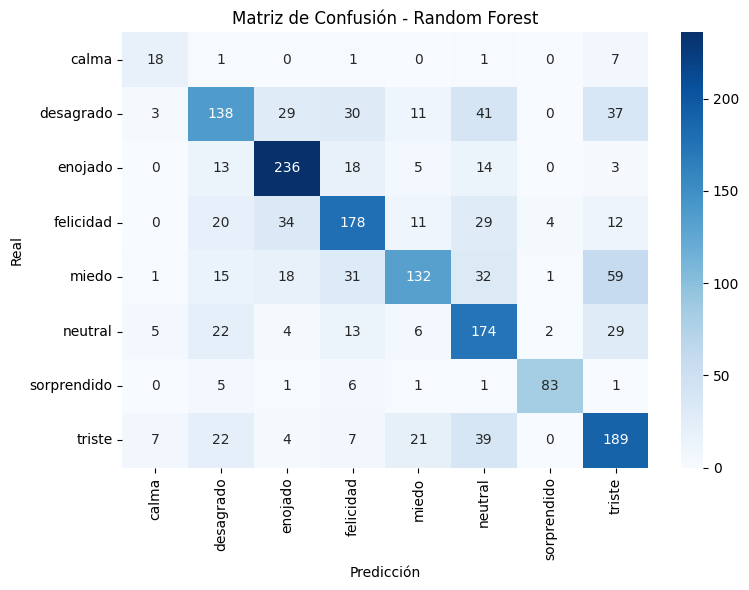

In [ ]:
from models.svm import run_svm

# Ejecutar modelo Random Forest
model, x_test_sample, feature_names = run_svm()

In [ ]:
from results.shap_graph import generate_shap_outputs

#print("📐 x_test_sample shape:", x_test_sample.shape)  # debe ser (N, M)
#print("📐 len(feature_names):", len(feature_names))    # debe ser M

# Generar explicaciones SHAP y exportar gráfico + CSV
generate_shap_outputs(model, x_test_sample, feature_names)

🔍 Generando explicaciones SHAP ...


  0%|          | 0/100 [00:00<?, ?it/s]

# Red Neuronal - Modelo Simple

In [ ]:
# Importación de librerías y dataset
import kagglehub
import pandas as pd
import numpy as np
import os
import sys
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
from src.split_data import split_data
from src.balanceo_data import balancear_smote

# Path de los conjuntos de datos
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

# Importar datasets de Kaggle
uwrfkaggler_ravdess_emotional_speech_audio_path = kagglehub.dataset_download('uwrfkaggler/ravdess-emotional-speech-audio')
print('Data source import complete.')

### 1. Ravdess Dataframe
# 2. Organización del problema
# Descripción del problema de clasificación y características del dataset
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []
file_path = []

for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0].split('-')
        file_emotion.append(int(part[2]))  # Extraer emoción
        file_path.append(Ravdess + dir + '/' + file)  # Crear ruta completa

# Crear DataFrame para emociones y rutas
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Cambiar enteros a emociones
Ravdess_df.replace({'Emotions': {
    1: 'neutral', 2: 'calma', 3: 'felicidad', 4: 'triste',
    5: 'enojado', 6: 'miedo', 7: 'desagrado', 8: 'sorprendido'
}}, inplace=True)

### 2. Conjunto de datos Crema
ejlok1_cremad_path = kagglehub.dataset_download('ejlok1/cremad')
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('triste')
    elif part[2] == 'ANG':
        file_emotion.append('enojado')
    elif part[2] == 'DIS':
        file_emotion.append('desagrado')
    elif part[2] == 'FEA':
        file_emotion.append('miedo')
    elif part[2] == 'HAP':
        file_emotion.append('felicidad')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('desconocido')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)

### 3. Conjunto de datos TESS
ejlok1_toronto_emotional_speech_set_tess_path = kagglehub.dataset_download('ejlok1/toronto-emotional-speech-set-tess')
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('sorprendido')
        elif part == 'fear':
            file_emotion.append('miedo')
        elif part == 'angry':
            file_emotion.append('enojado')
        elif part == 'disgust':
            file_emotion.append('desagrado')
        elif part == 'sad':
            file_emotion.append('triste')
        elif part == 'happy':
            file_emotion.append('felicidad')
        elif part == 'neutral':
            file_emotion.append('neutral')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)

### 4. Conjunto de datos Savee
ejlok1_surrey_audiovisual_expressed_emotion_savee_path = kagglehub.dataset_download('ejlok1/surrey-audiovisual-expressed-emotion-savee')
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('enojado')
    elif ele=='d':
        file_emotion.append('desagrado')
    elif ele=='f':
        file_emotion.append('miedo')
    elif ele=='h':
        file_emotion.append('felicidad')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('triste')
    else:
        file_emotion.append('sorprendido')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)

# Conjunto de datos usando los 4 conjuntos de datos que hemos creado.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)

X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    X.append(feature)
    Y.append(emotion)

# Convertir a DataFrame
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)

# División del Dataset
X = Features.iloc[:, :-1].values
Y = Features['labels'].values

# Codificación OneHot
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

# 4. División del dataset
x_train, x_test, x_val, y_train, y_test, y_val = split_data(X, Y)

# Aplicar la función de balanceo
x_train, y_train = balancear_smote(x_train, y_train)

# Escalado de datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Hacer compatible con el modelo
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

# 5. Implementar un modelo simple
def modelo_simple():
    model = Sequential()
    model.add(Input(shape=(x_train.shape[1], 1)))  # Mantener la forma de entrada
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))  # Ajustar según el número de clases
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 6. Evaluación y Comparación del Modelo
def prediccion_modelo(model):
    # Verificar la forma de los datos
    print("Forma de x_train:", x_train.shape)
    print("Forma de x_test:", x_test.shape)

    # Predicción
    pred_test = model.predict(x_test)
    y_pred = encoder.inverse_transform(pred_test)

    # Matriz de confusión
    cm = confusion_matrix(encoder.inverse_transform(y_test), y_pred)
    plt.figure(figsize=(12, 10))
    cm_df = pd.DataFrame(cm, index=encoder.categories_[0], columns=encoder.categories_[0])
    sns.heatmap(cm_df, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
    plt.title('Confusion Matrix', size=20)
    plt.xlabel('Predicted Labels', size=8)
    plt.ylabel('Actual Labels', size=8)
    plt.show()

    print(classification_report(encoder.inverse_transform(y_test), y_pred, zero_division=0))
# Entrenamiento del modelo
model = modelo_simple()
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau()])

# Predicción y evaluación
prediccion_modelo(model)
y_pred = model.predict(x_test)
#y_pred_classes = np.argmax(y_train, axis=1) # <-- Original line using y_train
y_pred_classes = np.argmax(y_pred, axis=1)   # <-- Corrected line using y_pred
y_test_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)

print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

# Gráfico de rendimiento del modelo durante el entrenamiento
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='accuracy en entrenamiento')
plt.plot(history.history['val_accuracy'], label='accuracy de validación')
plt.xlabel('épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Rendimiento del modelo durante el entrenamiento')
plt.grid()
plt.show()



#Modelo CNN

In [ ]:
from models.cnn import ejecutar_modelo_cnn

#Modelo CNN
modelo_cnn, x_test_sample = ejecutar_modelo_cnn()